# Project Update
## Date: 06/08/2021
## Team: Bryce Randolph, Jeannie Davis, Harsandeep Singh, Kevin Robell

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
sns.set()
rcParams['figure.figsize'] = 8,6
sns.set_context('talk')   # 'talk' for slightly larger

## Choice of Dataset
Our dataset is focused on the 2019 season from this dataset of NBA games(games.csv). https://www.kaggle.com/nathanlauga/nba-games. We are choosing to make the program modular enough that other seasons can also be analyzed, but only a single season is chosen at a time to stay within the goals of the project. Drop the games.csv in the same folder as this file to run the following code.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/harsandeep1/cst383-final-project/main/games.csv")
df = df[df.SEASON == 2019]

In [3]:
df

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
1206,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,25.0,41.0,1610612747,106.0,0.483,0.643,0.314,23.0,46.0,0
1207,2020-10-09,41900405,Final,1610612747,1610612748,2019,1610612747,108.0,0.463,0.857,...,21.0,41.0,1610612748,111.0,0.458,0.955,0.424,26.0,35.0,0
1208,2020-10-06,41900404,Final,1610612748,1610612747,2019,1610612748,96.0,0.427,0.808,...,18.0,39.0,1610612747,102.0,0.443,0.857,0.359,25.0,42.0,0
1209,2020-10-04,41900403,Final,1610612748,1610612747,2019,1610612748,115.0,0.513,0.913,...,25.0,37.0,1610612747,104.0,0.430,0.759,0.333,23.0,43.0,1
1210,2020-10-02,41900402,Final,1610612747,1610612748,2019,1610612747,124.0,0.505,0.588,...,32.0,44.0,1610612748,114.0,0.507,0.912,0.407,29.0,37.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17673,2019-10-05,11900005,Final,1610612754,1610612758,2019,1610612754,130.0,0.521,0.944,...,35.0,51.0,1610612758,106.0,0.378,0.780,0.353,24.0,35.0,1
17674,2019-10-05,11900006,Final,1610612744,1610612747,2019,1610612744,101.0,0.393,0.769,...,20.0,47.0,1610612747,123.0,0.475,0.633,0.303,32.0,58.0,0
17675,2019-10-05,11900007,Final,1610612759,1610612753,2019,1610612759,89.0,0.388,0.750,...,22.0,40.0,1610612753,125.0,0.526,0.714,0.361,29.0,47.0,0
17676,2019-10-04,11900002,Final,1610612746,1610612745,2019,1610612746,96.0,0.384,0.600,...,26.0,49.0,1610612745,109.0,0.375,0.800,0.229,21.0,52.0,0


## What we are going to predict
We want to predict the winner of an NBA game based on the game stats from the 2019 season which is in the HOME_TEAM_WINS column.


## Predictors
To predict the winner of each game we will use all of the game stats except for the PTS_away and PTS_home columns. In addition, two predictors have been added, the REB_PCT_away and REB_PCT_home columns, based upon the REB_away and REB_home columns as seen below.

#### List of Predictors 
 8   FG_PCT_home       1241 non-null   float64   
 9   FT_PCT_home       1241 non-null   float64   
 10  FG3_PCT_home      1241 non-null   float64   
 11  AST_home          1241 non-null   float64   
 12  REB_home          1241 non-null   float64   
 15  FG_PCT_away       1241 non-null   float64   
 16  FT_PCT_away       1241 non-null   float64   
 17  FG3_PCT_away      1241 non-null   float64   
 18  AST_away          1241 non-null   float64   
 19  REB_away          1241 non-null   float64   
 21  REB_PCT_away      1241 non-null   float64   
 22  REB_PCT_home      1241 non-null   float64   

In [4]:
df['REB_PCT_away'] = df['REB_away'] / (df['REB_away'] + df['REB_home'])
df['REB_PCT_home'] = df['REB_home'] / (df['REB_away'] + df['REB_home'])

## Preprocessing
The dataset doesn't have any na values so it's unnecessary to drop columns for that reason. All games are final which means we don't need to drop partially completed games. At the same time, the columns GAME_DATE_EST, GAME_ID, GAME_STATUS_TEXT, HOME_TEAM_ID, VISITOR_TEAM_ID, SEASON, TEAM_ID_home, PTS_home, TEAM_ID_away, and PTS_away aren't used so they will all be dropped.

In [5]:
df.isna().sum() # Shows that data doesn't have NA values.

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
REB_PCT_away        0
REB_PCT_home        0
dtype: int64

In [6]:
(df['GAME_STATUS_TEXT'] != 'Final').sum() # Shows that all games are finished.

0

In [17]:
col_to_drop = ['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'TEAM_ID_away', 'PTS_away']
df.drop(col_to_drop, axis = 1, inplace=True)

## Exploration and Visualization
We took a look at the data to see which predictors correlated well with the outcome of the game and created some graphs to look at how certain predictors factored into who ended up winning.

In [18]:
df.info() # Basic data exploration

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 1206 to 17677
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FG_PCT_home     1241 non-null   float64
 1   FT_PCT_home     1241 non-null   float64
 2   FG3_PCT_home    1241 non-null   float64
 3   AST_home        1241 non-null   float64
 4   REB_home        1241 non-null   float64
 5   FG_PCT_away     1241 non-null   float64
 6   FT_PCT_away     1241 non-null   float64
 7   FG3_PCT_away    1241 non-null   float64
 8   AST_away        1241 non-null   float64
 9   REB_away        1241 non-null   float64
 10  HOME_TEAM_WINS  1241 non-null   int64  
 11  REB_PCT_away    1241 non-null   float64
 12  REB_PCT_home    1241 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 135.7 KB


In [19]:
df.describe() #Basic data Exploration

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,REB_PCT_away,REB_PCT_home
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000
mean,0.463043,0.769757,0.359782,24.710717,45.438356,0.455907,0.771137,0.353089,23.791297,44.197421,0.536664,0.493189,0.506811
std,0.056152,0.098386,0.085668,4.850270,6.845032,0.054403,0.102825,0.084250,4.851417,6.680293,0.498855,0.053270,0.053270
min,0.269000,0.400000,0.118000,11.000000,24.000000,0.308000,0.375000,0.094000,10.000000,25.000000,0.000000,0.321429,0.333333
25%,0.425000,0.706000,0.300000,21.000000,41.000000,0.418000,0.706000,0.297000,20.000000,40.000000,0.000000,0.458824,0.469388
50%,0.462000,0.778000,0.359000,25.000000,45.000000,0.455000,0.774000,0.353000,24.000000,44.000000,1.000000,0.493827,0.506173
75%,0.505000,0.838000,0.417000,28.000000,50.000000,0.494000,0.840000,0.406000,27.000000,48.000000,1.000000,0.530612,0.541176
max,0.633000,1.000000,0.629000,43.000000,67.000000,0.674000,1.000000,0.680000,40.000000,65.000000,1.000000,0.666667,0.678571


In [11]:
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,REB_PCT_away,REB_PCT_home
1206,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,1610612747,106.0,0.483,0.643,0.314,23.0,46.0,0,0.528736,0.471264
1207,2020-10-09,41900405,Final,1610612747,1610612748,2019,1610612747,108.0,0.463,0.857,...,1610612748,111.0,0.458,0.955,0.424,26.0,35.0,0,0.460526,0.539474
1208,2020-10-06,41900404,Final,1610612748,1610612747,2019,1610612748,96.0,0.427,0.808,...,1610612747,102.0,0.443,0.857,0.359,25.0,42.0,0,0.518519,0.481481
1209,2020-10-04,41900403,Final,1610612748,1610612747,2019,1610612748,115.0,0.513,0.913,...,1610612747,104.0,0.430,0.759,0.333,23.0,43.0,1,0.537500,0.462500
1210,2020-10-02,41900402,Final,1610612747,1610612748,2019,1610612747,124.0,0.505,0.588,...,1610612748,114.0,0.507,0.912,0.407,29.0,37.0,1,0.456790,0.543210


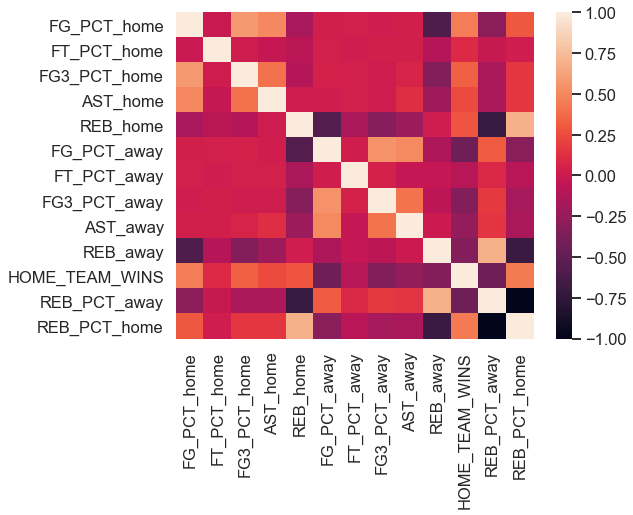

In [27]:
sns.heatmap(df.corr());

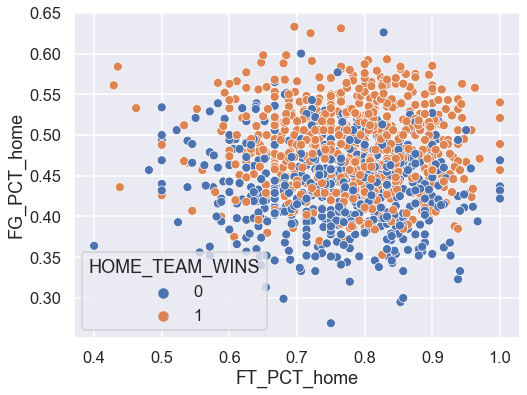

In [31]:
sns.scatterplot(x="FT_PCT_home", y="FG_PCT_home", hue='HOME_TEAM_WINS', data=df);

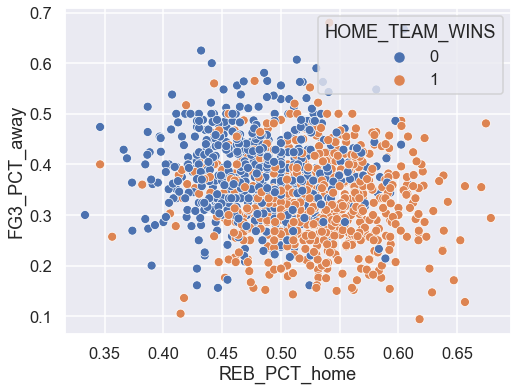

In [32]:
sns.scatterplot(x="REB_PCT_home", y="FG3_PCT_away", hue='HOME_TEAM_WINS', data=df);

## Prelimary Machine Learning

In [22]:
np.random.seed(42)  
# select the predictor variables and target variables to be used with regression
predictors = ['FG_PCT_home','FT_PCT_home','FG3_PCT_home','AST_home', 'REB_home', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'REB_PCT_home', 'REB_PCT_away']
#dropping categortical features, such as GAME_ID,HOME_TEAM_ID, and a few more. 
target = 'HOME_TEAM_WINS'
X = df[predictors].values
y = df[target].values

In [23]:
# KNN can be slow, so get a random sample of the full data set
indexes = np.random.choice(y.size, size=10000)
X_mini = X[indexes]
y_mini = y[indexes]

In [24]:
# Split the data into training and test sets, and scale
scaler = StandardScaler()

# unscaled version (note that scaling is only used on predictor variables)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_mini, y_mini, test_size=0.30, random_state=42)

# scaled version
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [25]:
# sanity check
print(X_train.shape)
print(X_train[:3])

(7000, 12)
[[-0.80000068  0.47504509 -2.00414024 -1.16536818  0.97470006 -0.74562742
  -0.30180371 -0.90361939 -0.37293376  0.12726554  0.5582232  -0.5582232 ]
 [-0.02297033  0.64720376 -1.48049927  0.48250239 -0.92063105 -0.69061735
  -0.42014595  0.6924874  -0.37293376  0.72616218 -1.1870367   1.1870367 ]
 [-0.14658879  0.46491811 -0.04921394  0.48250239  1.55787886 -1.14903458
  -0.54835005  0.12498276 -0.37293376  0.42671386  0.70112772 -0.70112772]]
